In [344]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Top_1000_IMDb_movies_New_version.csv')
df

,ID,Movie_Name,Year_of_Release,Watch_Time,Movie_Rating,Metascore,Gross,Votes,Description
0,0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378","Over the course of several years, two convicts..."
1,1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588","Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,195,9.0,95.0,96.90,"13,97,886","In German-occupied Poland during World War II,..."
4,4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...,...
995,995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336",A world-weary political journalist picks up th...
996,996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004",Tells the story of a young woman's relentless ...
997,997,Shine,1996,105,7.6,87.0,35.81,"55,589","Pianist David Helfgott, driven by his father a..."
998,998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822","A scientist finds a way of becoming invisible,..."


In [345]:
df.drop(['ID', 'Movie_Name', 'Description', 'Votes'], axis=1, inplace=True)
df

,Year_of_Release,Watch_Time,Movie_Rating,Metascore,Gross
0,1994,142,9.3,82.0,28.34
1,1972,175,9.2,100.0,134.97
2,2008,152,9.0,84.0,534.86
3,1993,195,9.0,95.0,96.90
4,1957,96,9.0,97.0,4.36
...,...,...,...,...,...
995,2013,98,7.6,77.0,37.71
996,2004,133,7.6,76.0,6.17
997,1996,105,7.6,87.0,35.81
998,1933,71,7.6,87.0,NaN


In [346]:
df.isnull().sum()

Year_of_Release      0
Watch_Time           0
Movie_Rating         0
Metascore          155
Gross              162
dtype: int64

In [347]:
df.duplicated().sum()

1

In [348]:
#Metascore
df['missing_metascore'] = df['Metascore'].isnull()
median_metascore = df['Metascore'].median()
df['Metascore'].fillna(median_metascore, inplace=True)

#Gross
df['missing_gross'] = df['Gross'].isnull()
median_gross = df['Gross'].median()
df['Gross'].fillna(median_gross, inplace=True)

In [349]:
# Filter the rows where data was imputed
imputed_rows = df[df['missing_metascore'] | df['missing_gross']]
# Remove the newly created columns
df.drop(['missing_metascore', 'missing_gross'], axis=1, inplace=True)

# Display
imputed_data = imputed_rows[['Metascore', 'Gross']]
print(imputed_data)

     Metascore    Gross
15        80.0  219.000
16        80.0   25.475
23        80.0   25.475
24        80.0   25.475
37        80.0   25.475
..         ...      ...
979       73.0   25.475
983       89.0   25.475
987       72.0   25.475
998       87.0   25.475
999       80.0   25.475

[244 rows x 2 columns]


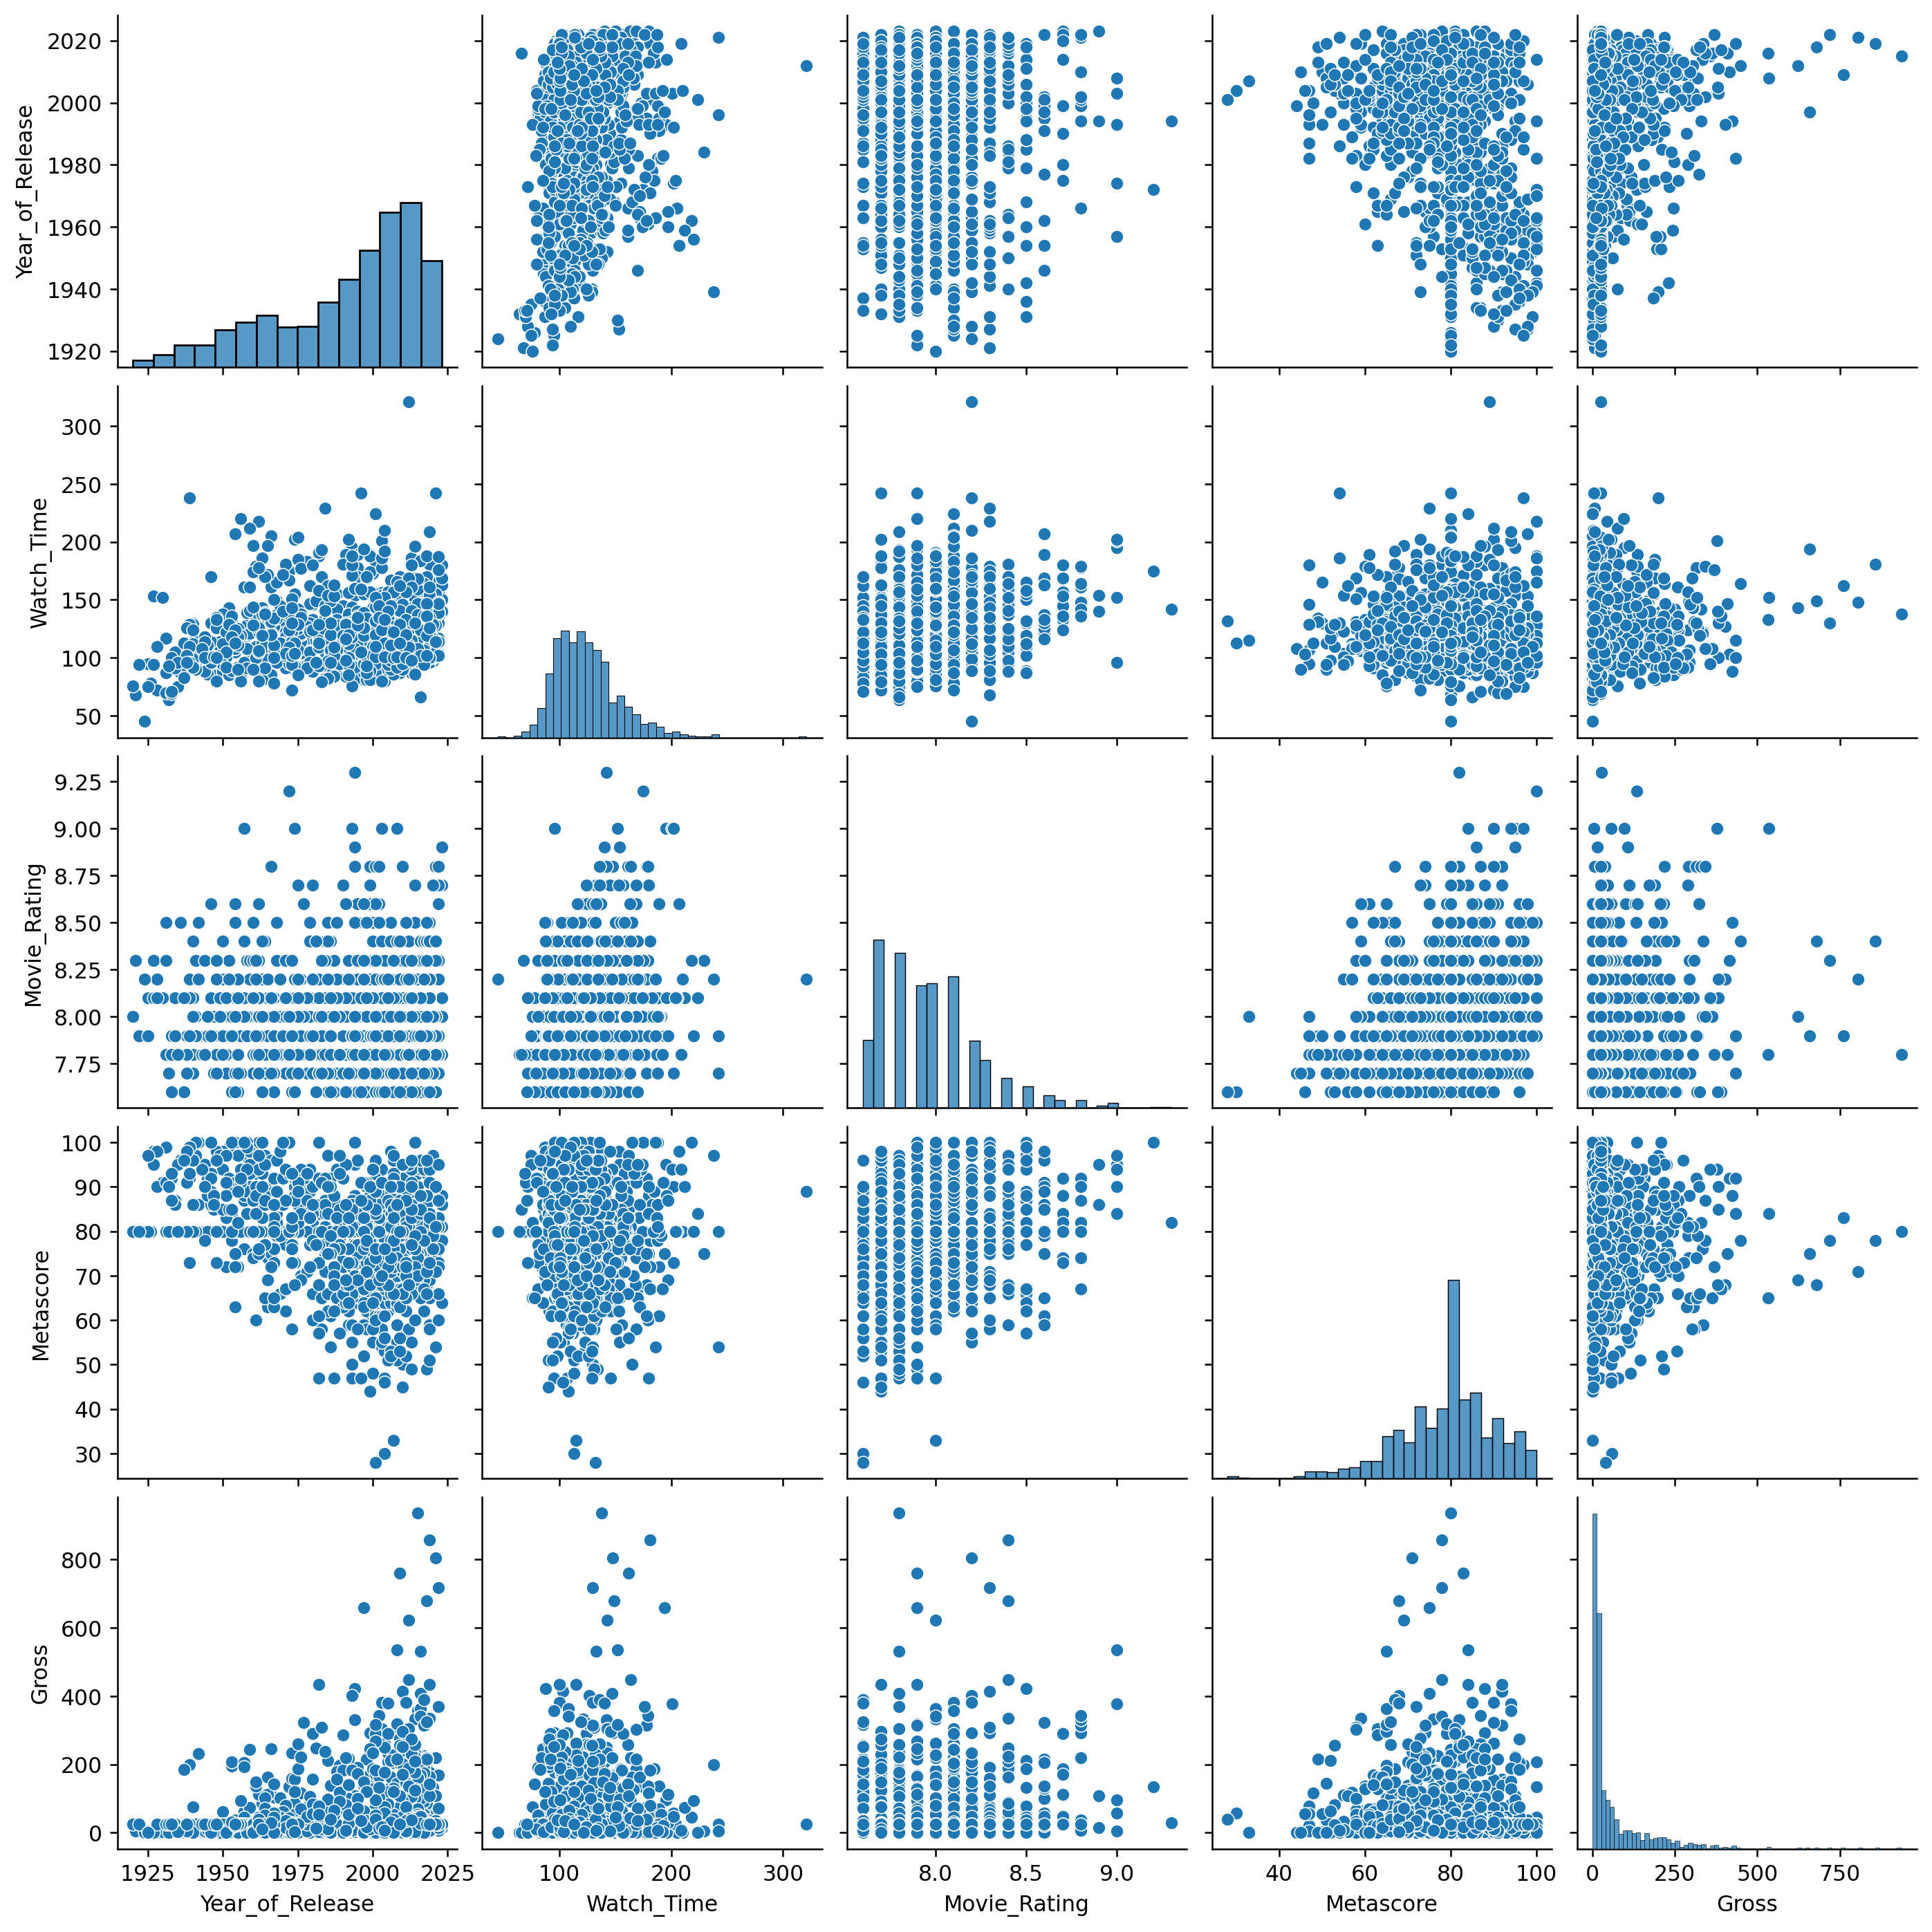

In [350]:
sns.pairplot(df)

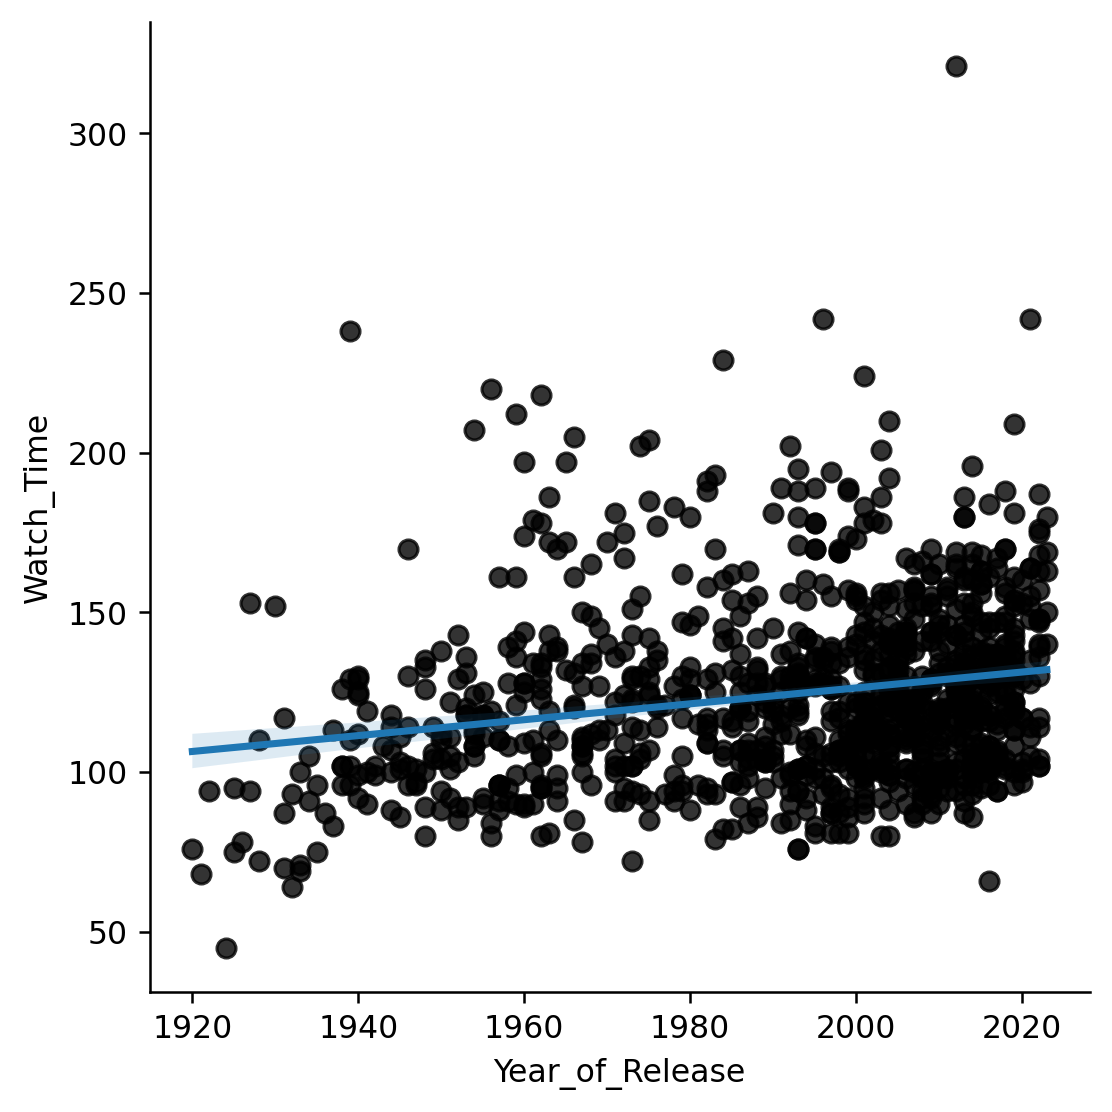

In [351]:
sns.lmplot(x="Year_of_Release", y="Watch_Time", data=df, scatter_kws={"color": "#000"})
plt.show()

<Axes: >

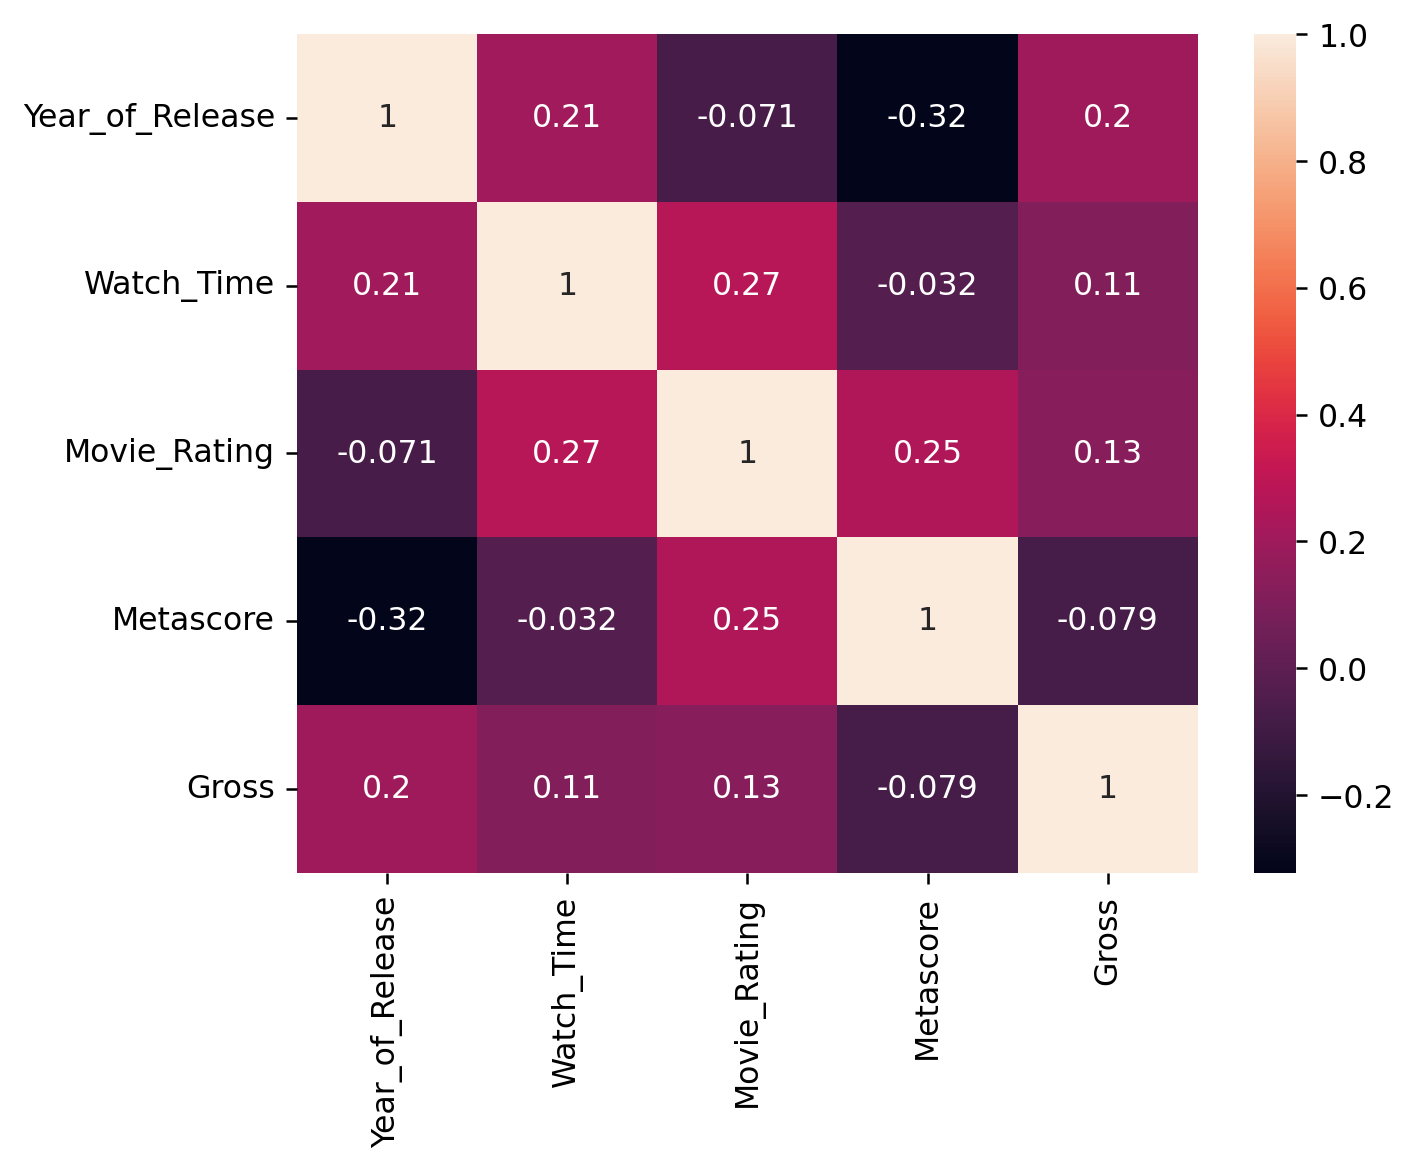

In [352]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

In [353]:
df = df.sample(frac=1)
X = df['Year_of_Release']
#X

In [354]:
y = df['Watch_Time']
X_train = X.iloc[:int(0.8*len(X))]
X_test = X.iloc[int(0.8*len(X)):]
Y_train = y.iloc[:int(0.8*len(y))]
Y_test = y.iloc[int(0.8*len(y)):]

In [355]:
def Lossfunction(x, y, m, b):
    total_err = 0
    for i in range(len(x)):
        total_err += (y.iloc[i] - (m * x.iloc[i] + b)) ** 2
    return total_err / len(x)

In [356]:
def minmax_normalize(data):
    return (data - data.min()) / (data.max() - data.min())

X_train_normalized = minmax_normalize(X_train)
X_test_normalized = minmax_normalize(X_test)

Y_train_normalized = minmax_normalize(Y_train)
Y_test_normalized = minmax_normalize(Y_test)

In [357]:
def gradient_descent(m_now, b_now, x, y, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(x)
    
    for i in range(n):
        m_gradient += -(2/len(X)) * x.iloc[i] * (y.iloc[i] - (m_now * x.iloc[i] + b_now))
        b_gradient += -(2/len(X)) * (y.iloc[i] - (m_now * x.iloc[i] + b_now))
    
        #print(f"{m_gradient}, {b_gradient}")
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

In [358]:
m, b = 0, 0
L = 0.0000001
epochs = 850
mse = []

In [514]:
for i in range(epochs):
    #m, b = gradient_descent(m, b, X_train, Y_train, L)
    #loss = Lossfunction(X_train, Y_train, m, b)
    m, b = gradient_descent(m, b, X_train_normalized, Y_train_normalized, L)
    loss = Lossfunction(X_train_normalized, Y_train_normalized, m, b)
    if i % 50 == 0:
        print(f"Epoch {i}")
        #print(f"Epoch {i}, m: {m}, b: {b}, Loss: {loss}")
    mse.append(loss)
print(m, b)

Epoch 0
Epoch 50
Epoch 100
Epoch 150
Epoch 200
Epoch 250
Epoch 300
Epoch 350
Epoch 400
Epoch 450
Epoch 500
Epoch 550
Epoch 600
Epoch 650
Epoch 700
Epoch 750
Epoch 800
0.06223022884074565 0.016925566705928426


In [515]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    plt.figure(figsize=(7,7))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title, fontsize=14)
    plt.xlabel('Movie Rating', fontsize=11)
    plt.ylabel('Watch Time', fontsize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

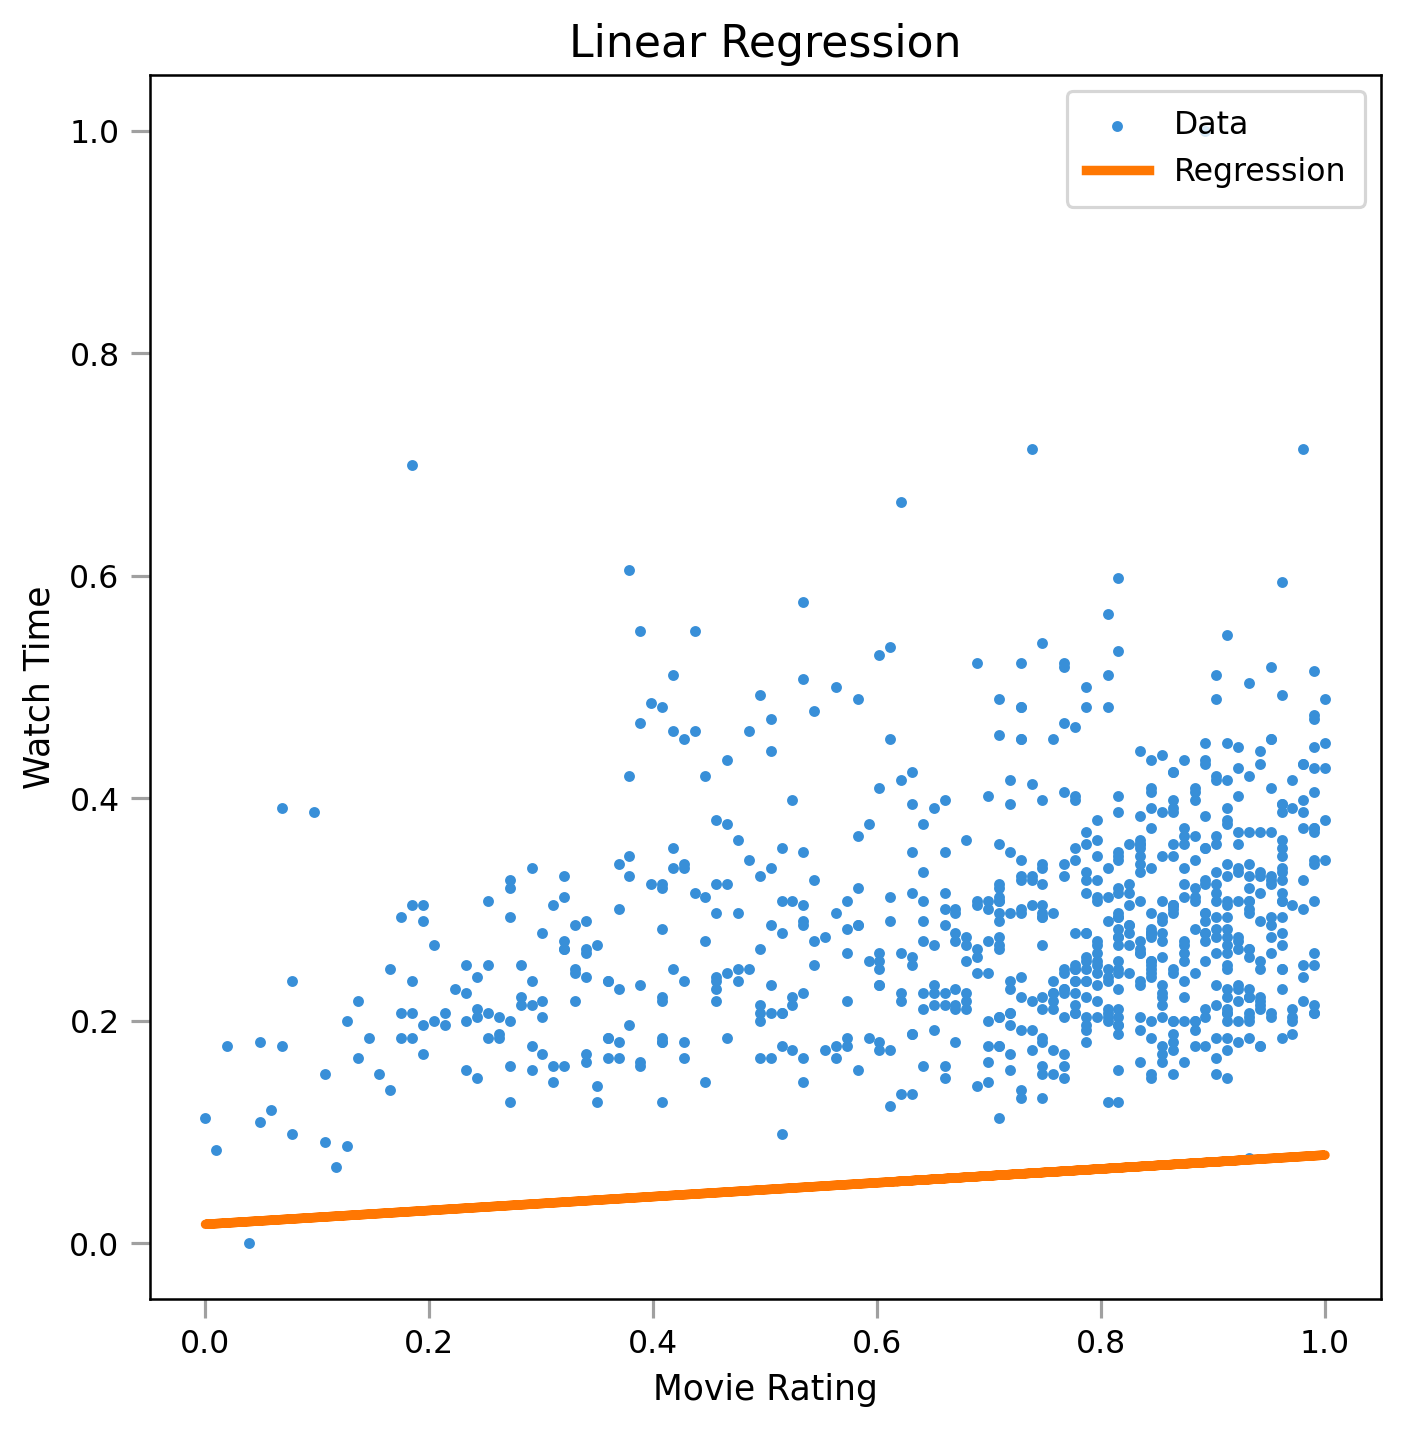

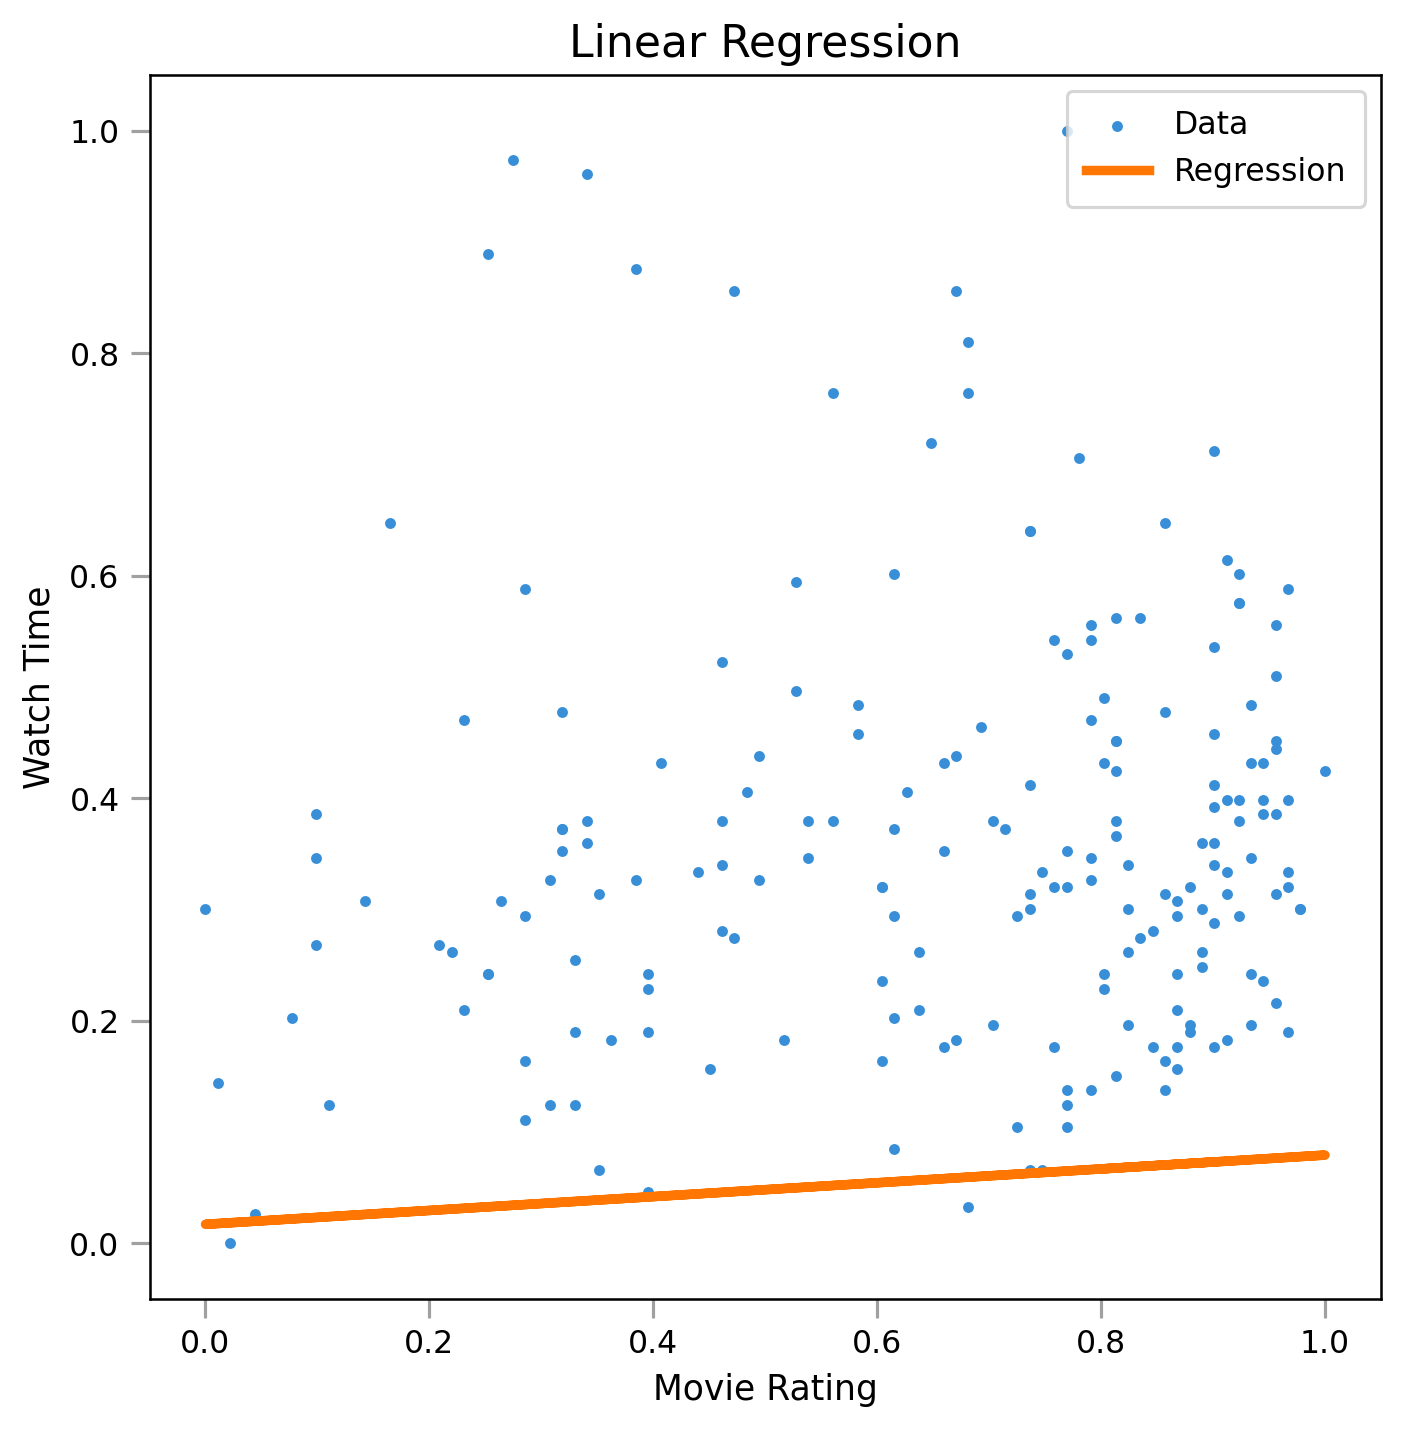

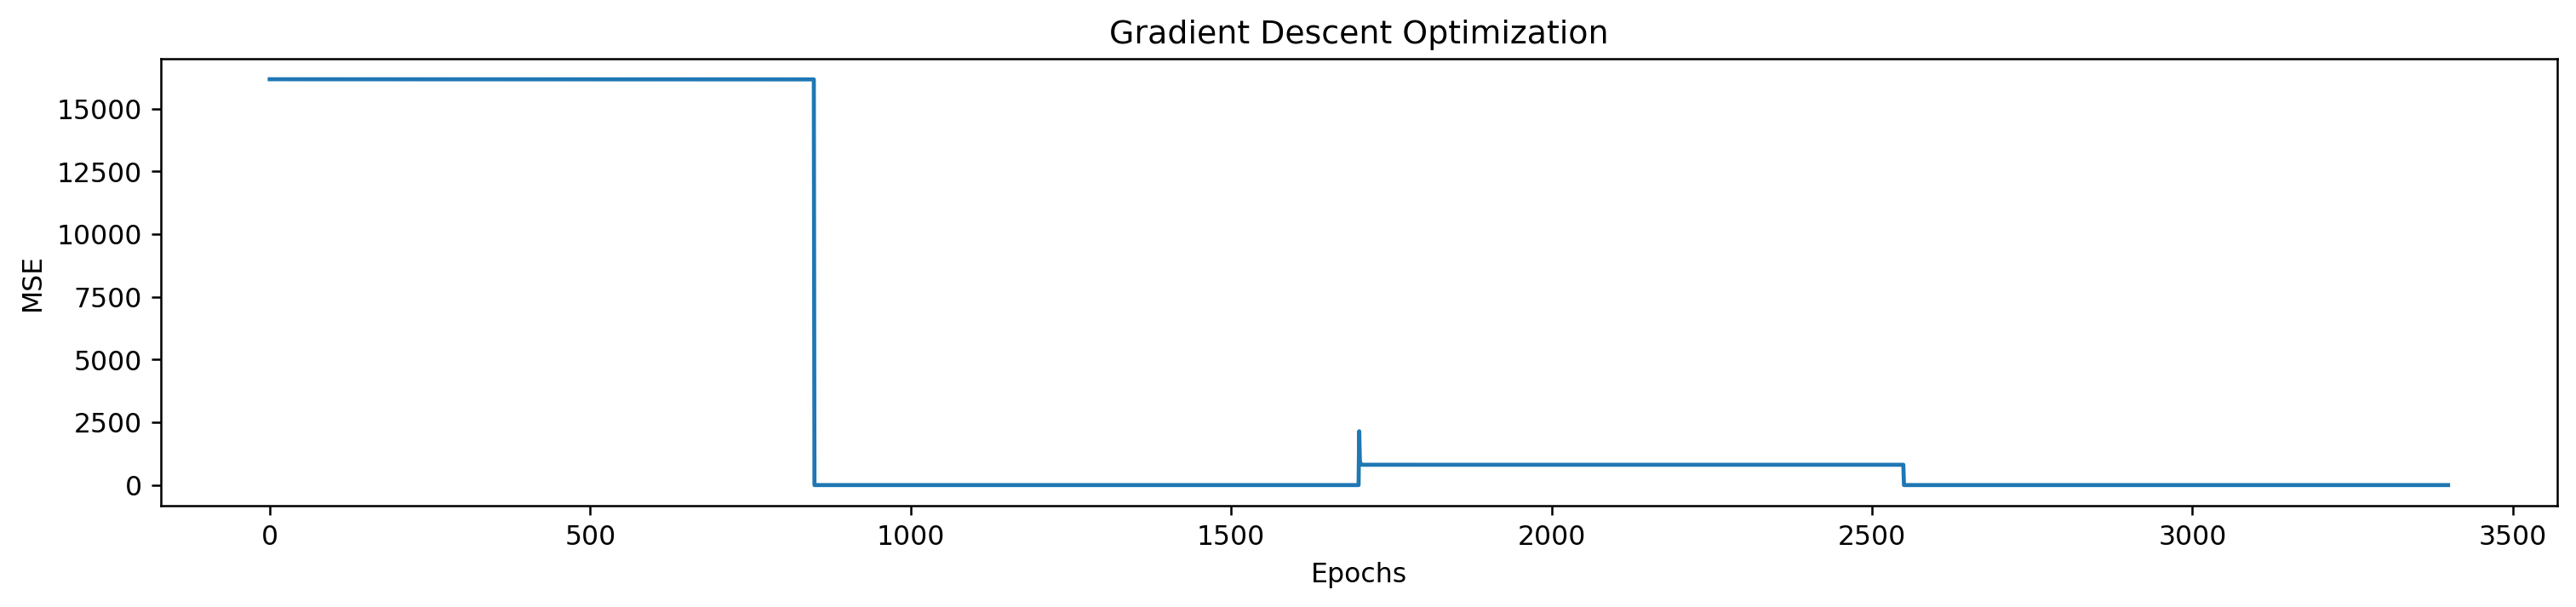

In [516]:
y_pred = m * X_train + b
y_pred_test = m * X_test + b

y_pred_normalized = m * X_train_normalized + b
y_pred_test_normalized = m * X_test_normalized + b

#plot_regression(X_train, Y_train, y_pred, title="Linear Regression")
#plot_regression(X_test, Y_test, y_pred_test, title="Linear Regression")

plot_regression(X_train_normalized, Y_train_normalized, y_pred_normalized, title="Linear Regression")
plot_regression(X_test_normalized, Y_test_normalized, y_pred_test_normalized, title="Linear Regression")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [517]:
def r_squared(y,y_pred):
    y_mean = np.full((len(y)), np.mean(y))
    err_reg = sum((y - y_pred)**2)
    err_y_mean = sum((y - y_mean)**2)
    return (1 - (err_reg/err_y_mean))

In [518]:
#r_squared(Y_test,y_pred_test)
r_squared(Y_test_normalized,y_pred_test_normalized)

-2.550107728661401

In [519]:
#r_squared(Y_train,y_pred)
r_squared(Y_train_normalized,y_pred_normalized)

-4.623376035750591

In [526]:
df_comp = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred_test_normalized})

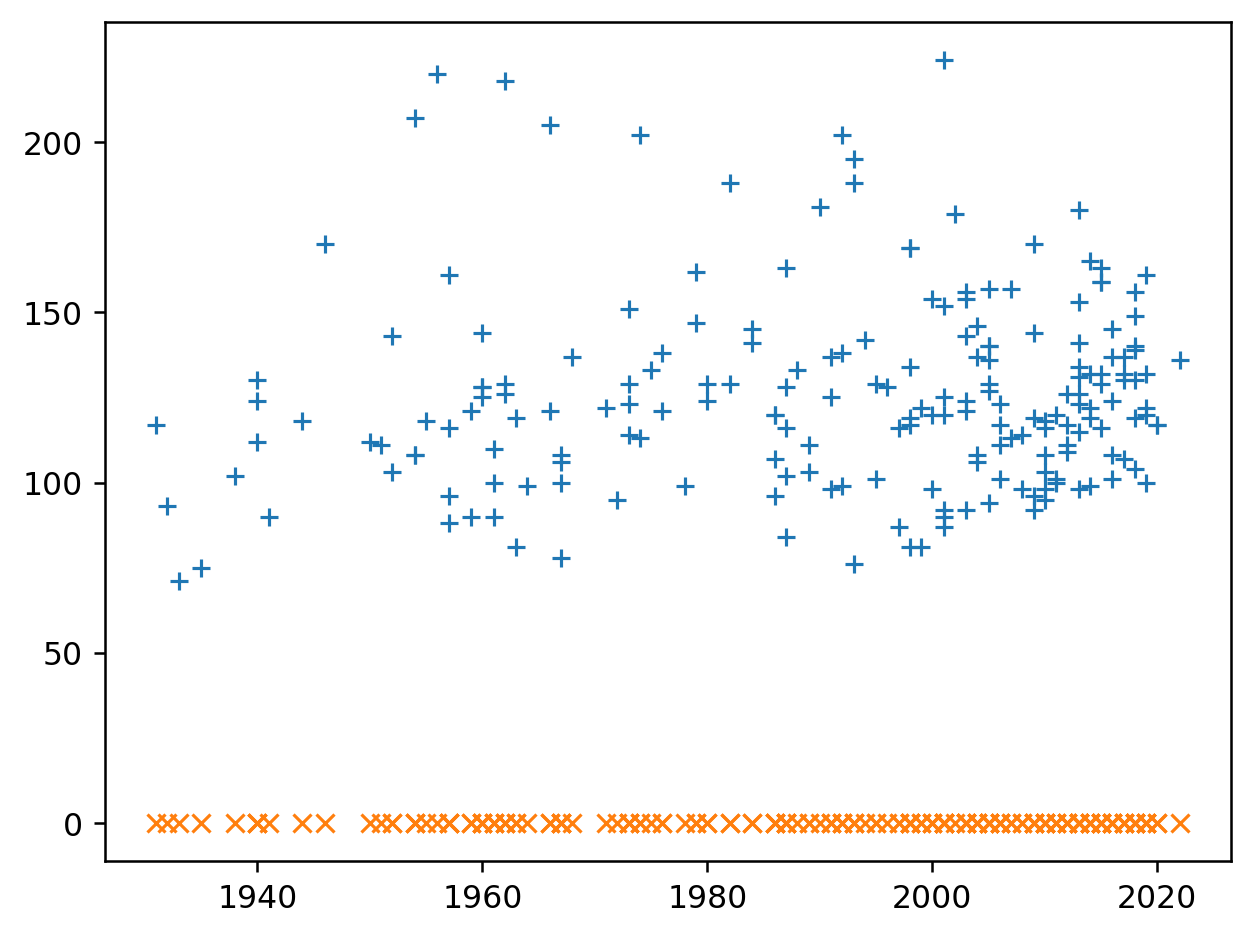

In [527]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    plt.plot(X_test, df_comp['Actual'], '+', label='Actual values')
    plt.plot(X_test, df_comp['Predicted'], 'x', label='Predicted values')
    
    plt.show()

compare_plot(df_comp)

In [528]:
#for column in df.select_dtypes(include=['number']):
#    plt.figure(figsize=(8, 4))
#    sns.boxplot(x=df[column])
#    plt.title(f'Box Plot for {column}')
#    plt.show()